In [3]:

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs

#  from pandas.tools.plotting import parallel_coordinates
from pandas.plotting import parallel_coordinates


print("--")



--


In [22]:

l_xycoord, l_label = make_blobs(n_samples=20, centers=3, n_features=2, random_state=0)

print(l_xycoord)
print(l_label)

print("--")


[[ 1.12031365  5.75806083]
 [-1.91423083  2.61557951]
 [ 1.28933778  3.44969159]
 [ 2.21021495  1.27582618]
 [ 4.32502215 -0.55670201]
 [-2.57545698  1.49786432]
 [-3.2331742   4.86865766]
 [ 1.16748177 -1.08313281]
 [ 0.87305123  4.71438583]
 [ 1.9263585   4.15243012]
 [ 3.58804674  2.36702243]
 [ 2.47034915  4.09862906]
 [-0.49772229  1.55128226]
 [ 2.10102604  0.71047981]
 [ 1.7373078   4.42546234]
 [-2.03655619  2.47980796]
 [-0.29661333  4.12026211]
 [-1.87481616  3.07423123]
 [ 2.91970372  0.15549864]
 [ 1.42013331  4.63746165]]
[0 2 0 1 1 2 2 1 0 0 1 0 1 1 0 2 2 2 1 0]
--


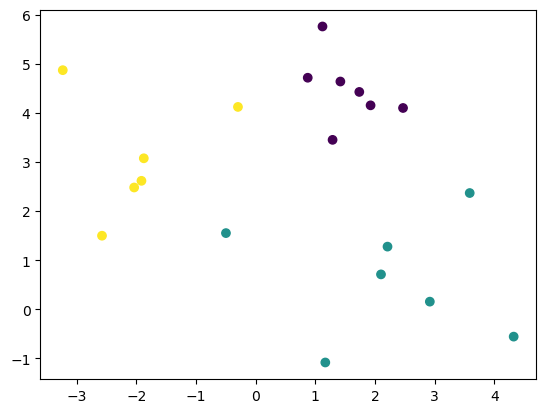

In [23]:

plt.scatter(l_xycoord[:,0], l_xycoord[:,1], c = l_label)
plt.show()


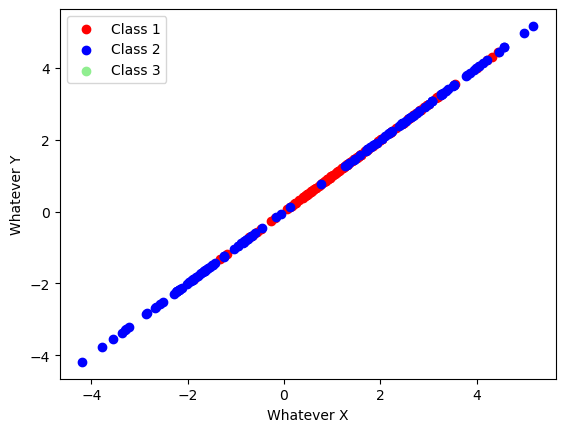

In [13]:

plt.scatter(X[:, 0], X[:, 1], c = l_label, label = "Class 1")
plt.scatter(X[:, 0], l_xycoord[:, 1], c = l_label, label = "Class 2")
plt.scatter(X[:, 0], l_xycoord[:, 1], c = l_label, label = "Class 3")


#  plt.scatter(X[y==1]['Flavanoids'], X[y==1]['NonflavanoidPhenols'], label='Class 1', c='red')
#  plt.scatter(X[y==2]['Flavanoids'], X[y==2]['NonflavanoidPhenols'], label='Class 2', c='blue')
#  plt.scatter(X[y==3]['Flavanoids'], X[y==3]['NonflavanoidPhenols'], label='Class 3', c='lightgreen')

# Prettify the graph
plt.legend()
plt.xlabel('Whatever X')
plt.ylabel('Whatever Y')

# display
plt.show()
